### Linear Regression to predict GDP and saving rate for future 5 years

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

gdp = pd.read_csv('../data/curated/gdp_with_saving_rate.csv').iloc[:, 1:]
gdp.rename({'gdp(USD Millioins)': 'gdp_USD'}, axis=1, inplace=True)
gdp

,year,gdp_USD,saving_rate(% of GDP)
0,1970,36910,13.965180
1,1971,40379,13.867941
2,1972,44556,14.922438
3,1973,49831,15.803160
4,1974,60374,12.301303
5,1975,71277,10.800341
6,1976,83377,9.912091
7,1977,96236,7.450473
8,1978,105094,9.405753
9,1979,118789,10.342062


In [2]:
gdp['log_year'] = np.log(gdp['year'])
gdp['log_gdp'] = np.log(gdp['gdp_USD'])
gdp['log_saving'] = np.log(gdp['saving_rate(% of GDP)'])

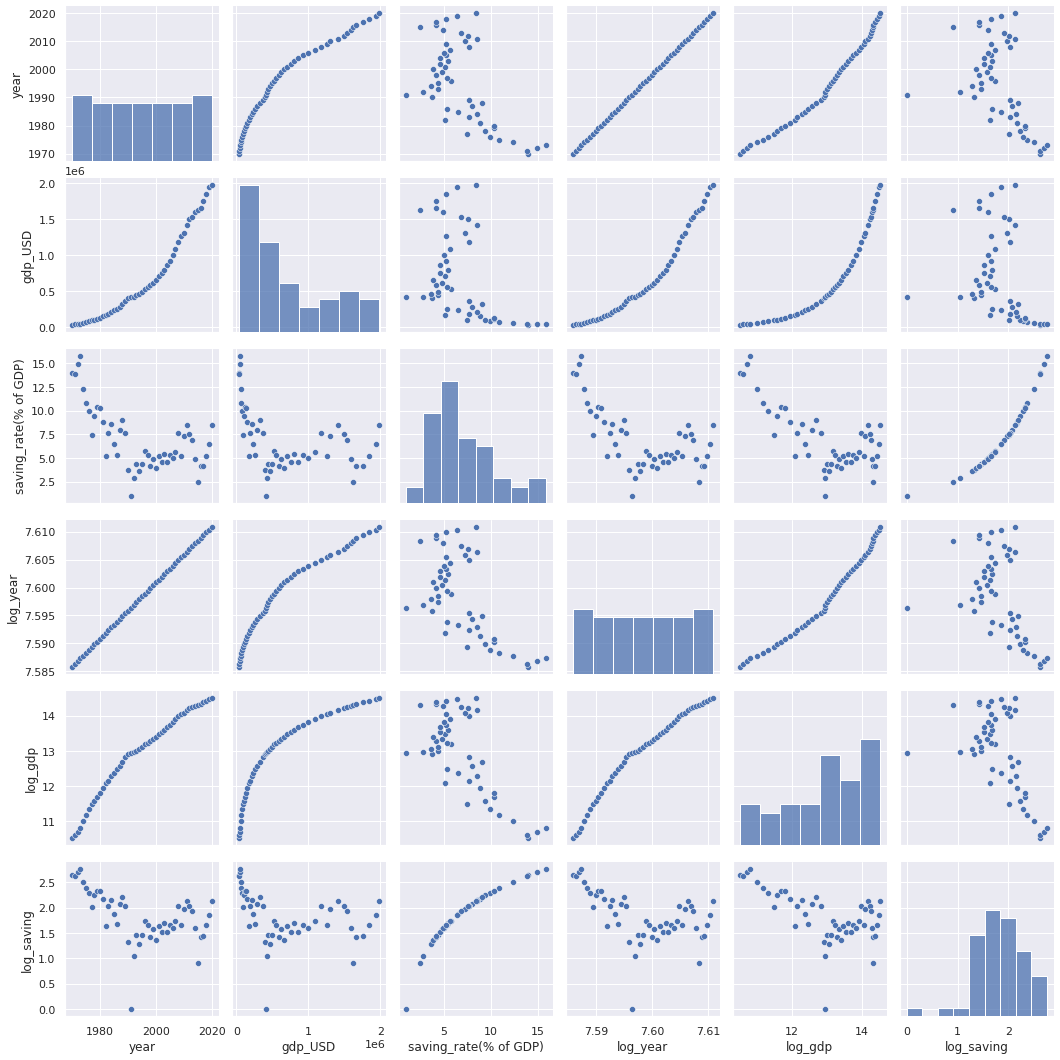

In [3]:
sns.pairplot(gdp)

### LR Model1: Log Year vs Log GDP

In [4]:
x = sm.add_constant(gdp['log_year'])
results = sm.OLS(gdp['log_gdp'], x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_gdp   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1365.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.94e-37
Time:                        20:30:30   Log-Likelihood:                 5.8675
No. Observations:                  51   AIC:                            -7.735
Df Residuals:                      49   BIC:                            -3.871
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1159.2104     31.729    -36.535      0.000   -1222.971   -1095.449
log_year     154.2625      4.176     36.943      0.000     145.871     162.654
==============================================================================
Omnibus:                        3.310   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                3.171
Skew:                          -0.569   Prob(JB):                        0.205
Kurtosis:                       2.555   Cond. No.                     7.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Log GDP')

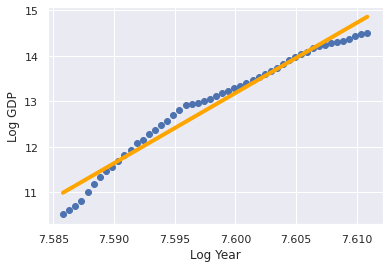

In [5]:
intercept = results.params[0]
coef = results.params[1]

predictions = intercept + coef * gdp['log_year']
#predictions = np.exp(predictions)
predictions
plt.scatter(gdp['log_year'], gdp['log_gdp'])
fig = plt.plot(gdp['log_year'], predictions, lw=4, c='orange')
plt.xlabel('Log Year')
plt.ylabel('Log GDP')

In [6]:
YEARS = [2021, 2022, 2023, 2024, 2025, 2026, 2027]

future_years = list(gdp['year']) + [x for x in YEARS]

future_log_years = list(gdp['log_year']) + [np.log(x) for x in YEARS]
print(f"Future Log Years list, length = {len(future_log_years)}")
print(future_log_years)

future_log_gdp = list(gdp['log_gdp']) + [(intercept+coef*np.log(x)) for x in YEARS]
print(f"Future Log GDP list, length = {len(future_log_gdp)}")
print(future_log_gdp)



Future Log Years list, length = 58
[7.585788821732034, 7.58629630715272, 7.586803535162581, 7.587310506022615, 7.587817219993427, 7.5883236773352225, 7.588829878307813, 7.589335823170617, 7.589841512182657, 7.590346945602565, 7.590852123688581, 7.591357046698551, 7.591861714889934, 7.592366128519796, 7.592870287844818, 7.59337419312129, 7.593877844605118, 7.594381242551817, 7.59488438721652, 7.5953872788539725, 7.595889917718538, 7.596392304064196, 7.596894438144544, 7.597396320212795, 7.597897950521784, 7.598399329323964, 7.59890045687141, 7.599401333415815, 7.599901959208498, 7.6004023345004, 7.600902459542082, 7.601402334583733, 7.601901959875166, 7.602401335665818, 7.602900462204755, 7.60339933974067, 7.603897968521881, 7.604396348796338, 7.60489448081162, 7.605392364814935, 7.605890001053122, 7.606387389772652, 7.60688453121963, 7.607381425639791, 7.607878073278507, 7.608374474380783, 7.60887062919126, 7.6093665379542115, 7.609862200913554, 7.610357618312838, 7.61085279039525, 7.6

### LR Model2: Log GDP vs Log Saving

In [7]:
x = sm.add_constant(gdp['log_gdp'])
results = sm.OLS(gdp['log_saving'], x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_saving   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     24.00
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.09e-05
Time:                        20:30:31   Log-Likelihood:                -26.053
No. Observations:                  51   AIC:                             56.11
Df Residuals:                      49   BIC:                             59.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9787      0.646      7.710      0.000       3.681       6.276
log_gdp       -0.2436      0.050     -4.899      0.000      -0.344      -0.144
==============================================================================
Omnibus:                       35.492   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.335
Skew:                          -1.824   Prob(JB):                     1.49e-25
Kurtosis:                       9.364   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Log Saving')

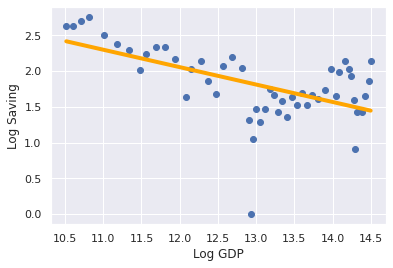

In [8]:
intercept = results.params[0]
coef = results.params[1]

predictions = intercept + coef * gdp['log_gdp']
#predictions = np.exp(predictions)
predictions
plt.scatter(gdp['log_gdp'], gdp['log_saving'])
fig = plt.plot(gdp['log_gdp'], predictions, lw=4, c='orange')
plt.xlabel('Log GDP')
plt.ylabel('Log Saving')

In [9]:
future_log_saving = list(gdp['log_saving']) + [intercept+coef*x for x in future_log_gdp[-7:]]
print(f"Future Log Saving list, length = {len(future_log_saving)}")
print(future_log_saving)

Future Log Saving list, length = 58
[2.636567082970115, 2.6295798070839878, 2.702865975523354, 2.7602099390692296, 2.5097052214589897, 2.3795776726619313, 2.293755336108262, 2.008277508224663, 2.2413215295042996, 2.3362192570452143, 2.3304716087325685, 2.174383711663656, 1.6428555694345304, 2.0331084063154856, 2.1470288080860267, 1.8652062175308617, 1.6763206382375593, 2.0747332808744923, 2.2007480707880736, 2.0395878560817553, 1.3176219124079882, -0.006214600801449525, 1.045958455391274, 1.4694423469819209, 1.2822042338341069, 1.4670980998526435, 1.7462636066398916, 1.6669815657583522, 1.4260786534448757, 1.5771537129184252, 1.363187797293944, 1.6429639640913603, 1.5285329539417651, 1.6888126395874725, 1.5271820455265233, 1.6650366732512532, 1.606691617812158, 1.7353789095303644, 2.0339711140835393, 1.6551965143659637, 1.983123729753766, 2.1410827207010175, 2.0243343373349787, 1.9259104491316026, 1.5915566678538142, 0.9152864539524234, 1.4265876007432408, 1.4310360710399015, 1.6559650

In [10]:
import os
if not os.path.exists('../data/curated/predicted'):
    os.makedirs('../data/curated/predicted')

future_gdp_dict = {"year": future_years, "gdp": np.exp(future_log_gdp).astype('int64'), "saving": np.exp(future_log_saving)}
future_gdp = pd.DataFrame(future_gdp_dict)
future_gdp.to_csv('../data/curated/predicted/gdp_with_saving_predicted.csv',index=False)